In [335]:
from pprint import pformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from GaussianNB import GaussianNB 
import metrics, utils
np.seterr(all="ignore")

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [336]:
# Load data:

data = pd.read_csv("bodyfat.csv")
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [337]:
# Preprocessing:

predict = 'BodyFat'

Y = data[predict]
X = data.drop(columns=[predict])
Xlabels = X.columns

Y = Y.transform(lambda x: 1 if x <= 5 else (2 if x>5 and x<=14 else (3 if x>14 and x<16 else(4 if x>=16 and x<25 else 5))))

print(f'Target Class:\n{Y.head()}')
print(f'Feature Class:\n{X.head()}')

Y = Y.to_numpy()
X = X.to_numpy()

Target Class:
0    2
1    2
2    5
3    2
4    5
Name: BodyFat, dtype: int64
Feature Class:
   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


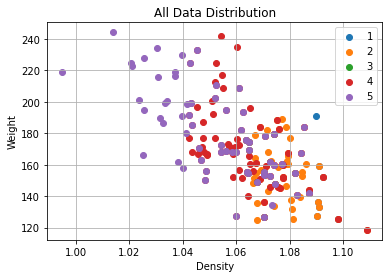

In [338]:
# Distrubuition of data: 

Xd = X.copy()
Yd = Y.copy()

TargetLabels = list(set(Y))

for i in range(len(Yd)):
    for j in range(i + 1, len(Yd)):
        if Yd[i] > Yd[j]:
            Yd[i], Yd[j] = Yd[j], Yd[i]
            Xd[i], Xd[j] = Xd[j], Xd[i]

lens = [0]
setY_ = list(set(Yd))
soma = 0
for i in range(len(setY_)):
    for j in range(len(Yd)):
        if Yd[j] == setY_[i]:
            soma += 1
    lens.append(soma)

plt.figure()
for i in range(len(setY_)):
    plt.scatter(Xd[lens[i]:lens[i+1]-1, 0], Xd[lens[i]:lens[i+1]-1, 2])
plt.legend(TargetLabels)
plt.ylabel(Xlabels[2])
plt.title("All Data Distribution")
plt.xlabel(Xlabels[0])
plt.grid()

In [339]:
# Get all analysis from the best model find:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = GaussianNB()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
scores = clf.scores(X_test)
accuracy = metrics.accuracy(Y_test, pred)
matrizConf = metrics.matrizConfusao(Y_test, pred)

print("---------------------------------")
print(f'Y_test =   {np.asarray(Y_test)}\nPredição = {pred}')
print("---------------------------------")

print("---------------------------------")
print(f'Scores = {scores}')
print("---------------------------------")

print("---------------------------------")
print(f'Accuracy = {accuracy}')
print("---------------------------------")

print("---------------------------------")
print(f'Matriz confusão:\n{matrizConf}')
print("---------------------------------")

---------------------------------
Y_test =   [2 3 4 2 5 4 2 2 2 4 5 4 2 4 4 2 5 5 2 4 5 4 4 4 4 4 3 5 4 2 2 2 2 5 2 3 4
 5 4 4 4 2 2 4 5 4 2 3 2 4 4]
Predição = [2. 4. 4. 2. 4. 4. 2. 2. 2. 4. 5. 5. 2. 4. 4. 2. 5. 5. 2. 4. 5. 4. 4. 4.
 2. 4. 3. 5. 4. 2. 2. 2. 2. 5. 2. 3. 4. 5. 4. 4. 4. 4. 1. 4. 5. 4. 4. 3.
 4. 4. 4.]
---------------------------------
---------------------------------
Scores = [0.95116993 0.68915281 0.99966903 0.99956729 0.80778347 0.99886171
 0.80421192 0.7021619  0.999807   0.98404502 0.99997269 0.99998054
 0.84436536 0.856231   0.99690112 0.90346521 0.99999929 1.
 0.99821652 0.87349614 0.99673027 0.99945596 0.65635021 0.9998482
 0.9994369  0.99783722 0.78933577 0.99600331 0.99576634 0.99853382
 0.99840032 0.98648985 0.97581912 0.99845046 0.99995755 0.71315708
 0.99990334 1.         0.9936829  0.9852411  0.99648085 0.99991053
 0.8914009  0.9997651  0.93841289 0.99988355 0.99939923 0.63793375
 0.63622821 0.99883255 0.92411081]
---------------------------------
---------

In [340]:
# Split one vs all classes:

# Get all classes in Y:

dataset = np.column_stack((X, Y))

columnsLabel = Xlabels.to_list()
columnsLabel.append("Classes")

dataset = pd.DataFrame(dataset, columns=columnsLabel)

def oneVSall(dataset, classe):
    dataset["Classes"] = dataset["Classes"].transform(lambda x: 1 if x == classe else 0)
    
    return dataset

0      0
1      0
2      1
3      0
4      1
      ..
247    0
248    1
249    1
250    1
251    1
Name: Classes, Length: 252, dtype: int64


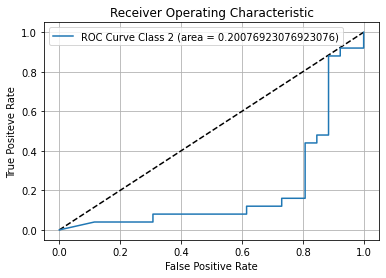

In [341]:
# Calculates the ROC analyses

dataset = oneVSall(dataset, 5)

predict = "Classes"

Y_ = dataset[predict]
X_ = dataset.drop(columns=[predict])

print(Y_)

Y_ = Y_.to_numpy()
X_ = X_.to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.2)

clf = GaussianNB()
clf.fit(X_train, Y_train)
scores = clf.scores(X_test)

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='dashed', color="k")
fpr, tpr, A = metrics.ROC(Y_test, scores)
plt.plot(fpr, tpr, label=f'ROC Curve Class {2} (area = {A})')
plt.legend()
plt.grid()
plt.ylabel("True Positeve Rate")
plt.xlabel("False Positive Rate")
plt.title(f'Receiver Operating Characteristic')
plt.show()
